In [2]:
import cv2
import os
# import numpy as np`
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [5]:
DATADIR = "C:/Rohit/Artificial Intelligence/dataset"
CATEGORIES = ["with_mask","without_mask"]

In [8]:
training_data = []
IMG_SIZE= 224

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass
        

create_training_data()

In [ ]:
len(training_data)

In [10]:
import random

random.shuffle(training_data)

In [11]:
Features=[]
Target=[]

for features,label in training_data:
    Features.append(features)
    Target.append(label)

In [12]:
Features=np.array(Features)
Target=np.array(Target)

In [4]:
Features.shape

(1376, 100, 100)

In [5]:
Target.shape

(1376,)

In [4]:
import pickle

In [16]:
pickle_out = open("Features_2.pickle","wb")
pickle.dump(Features, pickle_out)
pickle_out.close()

pickle_out = open("Target_2.pickle","wb")
pickle.dump(Target, pickle_out)
pickle_out.close()

In [5]:
pickle_in = open("Features_2.pickle","rb")
Features = pickle.load(pickle_in)

pickle_in = open("Target_2.pickle","rb")
Target= pickle.load(pickle_in)

In [6]:
Features.shape

(1376, 100, 100)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Train_Features,Test_Features,Train_Target,Test_Target=train_test_split(Features,Target,test_size=0.2)

In [11]:
Train_Features.shape

(1100, 100, 100)

In [12]:
Test_Features.shape

(276, 100, 100)

In [13]:
Train_Features=Train_Features.reshape(1100, 100, 100,1)

In [14]:
Train_Features.shape

(1100, 100, 100, 1)

In [15]:
Test_Features=Test_Features.reshape(276, 100, 100,1)

In [16]:
Test_Features.shape

(276, 100, 100, 1)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
Train_Target=to_categorical(Train_Target)

In [19]:
Train_Target.shape

(1100, 2)

In [20]:
Test_Target=to_categorical(Test_Target)

In [21]:
Test_Target.shape

(276, 2)

# 1. Specifiy the Architecture

In [19]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(Conv2D(95,(3,3),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(95,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(95,(3,3),activation="relu"))
model.add(Conv2D(95,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(95,activation="relu"))
model.add(Dense(2,activation="softmax"))

# 2. Compile the model 

In [21]:
from keras.optimizers import Adam

In [22]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

# 3. Train the Model

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
dataGen=ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,zoom_range=0.2)

In [25]:
model.fit_generator(dataGen.flow(Train_Features,Train_Target,batch_size=20),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
55/55 [==============================] - 161s 3s/step - loss: 6.1544 - accuracy: 0.5927
Epoch 2/20
55/55 [==============================] - 143s 3s/step - loss: 0.5917 - accuracy: 0.6982
Epoch 3/20
55/55 [==============================] - 133s 2s/step - loss: 0.5128 - accuracy: 0.7445
Epoch 4/20
55/55 [==============================] - 160s 3s/step - loss: 0.4249 - accuracy: 0.8027
Epoch 5/20
55/55 [==============================] - 129s 2s/step - loss: 0.3178 - accuracy: 0.8664
Epoch 6/20
55/55 [==============================] - 130s 2s/step - loss: 0.3581 - accuracy: 0.8291
Epoch 7/20
55/55 [==============================] - 125s 2s/step - loss: 0.4217 - accuracy: 0.8227
Epoch 8/20
55/55 [==============================] - 128s 2s/step - loss: 0.5232 - accuracy: 0.7482
Epoch 9/20
55/55 [==============================] - 927s 17s/step - loss: 0.4478 - accuracy: 0.8136
Epoch 10/20
55/55 [=============

In [26]:
model_json = model.to_json()

In [27]:
f=open('AICoronaMaskDetection.json','w')
f.write(model_json)
f.close()

In [28]:
model.save_weights('AICoronaMaskDetectionWeights.h5')

In [1]:
import os
from keras.models import model_from_json

In [2]:
json_file=open('C:/Users/Rohit Bale/Documents/Python Scripts/Major project/AICoronaMaskDetection.json','r')
loaded_model_json=json_file.read()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("C:/Users/Rohit Bale/Documents/Python Scripts/Major project/AICoronaMaskDetectionWeights.h5")

In [ ]:
import cv2

In [16]:
predictions = loaded_model.predict(Test_Features)

In [ ]:
import matplotlib.pyplot as plt

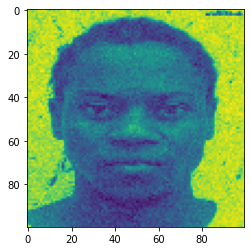

In [23]:
plt.imshow(Test_Features[145])

In [24]:
np.argmax(predictions[145])

1

In [3]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

In [4]:
def detect_and_predict_mask(frame, faceNet, maskNet):
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (100, 100),
		(104.0, 177.0, 123.0))
    
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)

	faces = []
	locs = []
	preds = []

	for i in range(0, detections.shape[2]):
		confidence = detections[0, 0, i, 2]

		if confidence > 0.5:
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
			face = cv2.resize(face, (100, 100))
			face = img_to_array(face)
			face = preprocess_input(face)

			faces.append(face)
			locs.append((startX, startY, endX, endY))

	if len(faces) > 0:
        
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	return (locs, preds)


In [5]:
import os
from keras.models import model_from_json

In [6]:
json_file=open('C:/Users/Rohit Bale/Documents/Python Scripts/Major project/AICoronaMaskDetection.json','r')
loaded_model_json=json_file.read()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("C:/Users/Rohit Bale/Documents/Python Scripts/Major project/AICoronaMaskDetectionWeights.h5")

In [7]:
prototxtPath = r"face_detector\deploy.prototxt"
weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

maskNet = loaded_model


In [8]:
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

[INFO] starting video stream...


In [9]:
while True:
	frame = vs.read()
	frame = imutils.resize(frame, width=400)

	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

	for (box, pred) in zip(locs, preds):
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	if key == ord("q"):
		break
        
cv2.destroyAllWindows()
vs.stop()

(1, 1, 97, 7)
(1, 1, 88, 7)
(1, 1, 91, 7)
(1, 1, 92, 7)
(1, 1, 89, 7)
(1, 1, 91, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 88, 7)
(1, 1, 88, 7)
(1, 1, 87, 7)
(1, 1, 88, 7)
(1, 1, 89, 7)
(1, 1, 91, 7)
(1, 1, 92, 7)
(1, 1, 88, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 94, 7)
(1, 1, 90, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 90, 7)
(1, 1, 96, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 96, 7)
(1, 1, 95, 7)
(1, 1, 96, 7)
(1, 1, 87, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 88, 7)
(1, 1, 88, 7)
(1, 1, 96, 7)
(1, 1, 94, 7)
(1, 1, 99, 7)
(1, 1, 92, 7)
(1, 1, 96, 7)
(1, 1, 96, 7)
(1, 1, 91, 7)
(1, 1, 94, 7)
(1, 1, 99, 7)
(1, 1, 92, 7)
(1, 1, 95, 7)
(1, 1, 94, 7)
(1, 1, 94, 7)
(1, 1, 93, 7)
(1, 1, 94, 7)
(1, 1, 93, 7)
(1, 1, 89, 7)
(1, 1, 93, 7)
(1, 1, 95, 7)
(1, 1, 87, 7)
(1, 1, 90, 7)
(1, 1, 88, 7)
(1, 1, 82, 7)
(1, 1, 88, 7)
(1, 1, 85, 7)
(1, 1, 81, 7)
(1, 1, 85, 7)
(1, 1, 87, 7)
(1, 1, 89, 7)
(1, 1, 90, 7)
(1, 1, 97, 7)
(1, 1, 100, 7)
(1, 1, 100, 7)
(1, 1, 104, 7)
(1,

(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 112, 7)
(1, 1, 112, 7)
(1, 1, 108, 7)
(1, 1, 108, 7)
(1, 1, 108, 7)
(1, 1, 104, 7)
(1, 1, 104, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 106, 7)
(1, 1, 106, 7)
(1, 1, 104, 7)
(1, 1, 104, 7)
(1, 1, 100, 7)
(1, 1, 100, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 109, 7)
(1, 1, 109, 7)
(1, 1, 111, 7)
(1, 1, 111, 7)
(1, 1, 111, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 109, 7)
(1, 1, 109, 7)
(1, 1, 104, 7)
(1, 1, 104, 7)
(1, 1, 104, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 111, 7)
(1, 1, 111, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 108, 7)
(1, 1, 108, 7)
(1, 1, 109, 7)
(1, 1, 109, 7)
(1, 1, 111, 7)
(1, 1, 111, 7)
(1, 1, 104, 7)
(1, 1, 104, 7)
(1, 1, 101, 7)
(1, 1, 101, 7)
(1, 1, 108, 7)
(1, 1, 108, 7)
(1, 1, 108, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 110, 7)
(1, 1, 111

(1, 1, 108, 7)
(1, 1, 101, 7)
(1, 1, 109, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 103, 7)
(1, 1, 106, 7)
(1, 1, 102, 7)
(1, 1, 109, 7)
(1, 1, 113, 7)
(1, 1, 109, 7)
(1, 1, 109, 7)
(1, 1, 113, 7)
(1, 1, 112, 7)
(1, 1, 107, 7)
(1, 1, 103, 7)
(1, 1, 103, 7)
(1, 1, 101, 7)
(1, 1, 101, 7)
(1, 1, 107, 7)
(1, 1, 107, 7)
(1, 1, 106, 7)
(1, 1, 106, 7)
(1, 1, 106, 7)
(1, 1, 109, 7)
(1, 1, 109, 7)
(1, 1, 101, 7)
(1, 1, 101, 7)
(1, 1, 103, 7)
(1, 1, 103, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 102, 7)
(1, 1, 102, 7)
(1, 1, 104, 7)
(1, 1, 104, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 99, 7)
(1, 1, 99, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 101, 7)
(1, 1, 95, 7)
(1, 1, 99, 7)
(1, 1, 99, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 109, 7)
(1, 1, 109, 7)
(1, 1, 106, 7)
(1, 1, 116, 7)
(1, 1, 114, 7)
(1, 1, 107, 7)
(1, 1, 105, 7)
(1, 1, 103, 7)
(1, 1, 101, 7)
(1, 1, 101, 7)
(1, 1, 91, 7)
(1, 1, 92, 7)
(1, 1, 100, 7)
(1, 1, 100, 7)
(1, 1, 100, 7)


(1, 1, 94, 7)
(1, 1, 94, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 88, 7)
(1, 1, 88, 7)
(1, 1, 88, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 93, 7)
(1, 1, 93, 7)
(1, 1, 90, 7)
(1, 1, 93, 7)
(1, 1, 93, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 88, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 93, 7)
(1, 1, 93, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 87, 7)
(1, 1, 87, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 96, 7)
(1, 1, 93, 7)
(1, 1, 91, 7)
(1, 1, 97, 7)
(1, 1, 98, 7)
(1, 1, 96, 7)
(1, 1, 96, 7)
(1, 1, 94, 7)
(1, 1, 93, 7)
(1, 1, 94, 7)
(1, 1, 98, 7)
(1, 1, 101, 7)
(1, 1, 100, 7)
(1, 1, 99, 7)
(1, 1, 106, 7)
(1, 1, 100, 7)
(1, 1, 108, 7)
(1, 1, 100, 7)
(1, 1, 104, 7)
(1, 1, 101, 7)
(1, 1, 101, 7)
(1, 1, 103, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 101, 7)
(1, 1, 99, 7)
(1, 1, 96, 7)
(1, 1, 99, 7)
(1, 1, 96, 7)
(1, 1, 98

(1, 1, 95, 7)
(1, 1, 96, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 98, 7)
(1, 1, 97, 7)
(1, 1, 96, 7)
(1, 1, 92, 7)
(1, 1, 100, 7)
(1, 1, 98, 7)
(1, 1, 95, 7)
(1, 1, 98, 7)
(1, 1, 96, 7)
(1, 1, 95, 7)
(1, 1, 93, 7)
(1, 1, 96, 7)
(1, 1, 93, 7)
(1, 1, 97, 7)
(1, 1, 96, 7)
(1, 1, 97, 7)
(1, 1, 100, 7)
(1, 1, 98, 7)
(1, 1, 91, 7)
(1, 1, 106, 7)
(1, 1, 103, 7)
(1, 1, 106, 7)
(1, 1, 104, 7)
(1, 1, 100, 7)
(1, 1, 101, 7)
(1, 1, 102, 7)
(1, 1, 103, 7)
(1, 1, 103, 7)
(1, 1, 104, 7)
(1, 1, 106, 7)
(1, 1, 90, 7)
(1, 1, 91, 7)
(1, 1, 90, 7)
(1, 1, 93, 7)
(1, 1, 100, 7)
(1, 1, 102, 7)
(1, 1, 104, 7)
(1, 1, 107, 7)
(1, 1, 104, 7)
(1, 1, 110, 7)
(1, 1, 106, 7)
(1, 1, 105, 7)
(1, 1, 104, 7)
(1, 1, 110, 7)
(1, 1, 108, 7)
(1, 1, 110, 7)
(1, 1, 108, 7)
(1, 1, 107, 7)
(1, 1, 111, 7)
(1, 1, 107, 7)
(1, 1, 109, 7)
(1, 1, 101, 7)
(1, 1, 96, 7)
(1, 1, 90, 7)
(1, 1, 98, 7)
(1, 1, 99, 7)
(1, 1, 100, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 102, 7)
(1, 1, 102, 7)
(1, 1, 107, 7)
(1, 1, 105, 7

(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 86, 7)
(1, 1, 86, 7)
(1, 1, 86, 7)
(1, 1, 85, 7)
(1, 1, 85, 7)
(1, 1, 85, 7)
(1, 1, 94, 7)
(1, 1, 94, 7)
(1, 1, 94, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 88, 7)
(1, 1, 88, 7)
(1, 1, 90, 7)
(1, 1, 90, 7)
(1, 1, 89, 7)
(1, 1, 89, 7)
(1, 1, 85, 7)
(1, 1, 85, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 92, 7)
(1, 1, 93, 7)
(1, 1, 93, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 94, 7)
(1, 1, 94, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 97, 7)
(1, 1, 101, 7)
(1, 1, 101, 7)
(1, 1, 99, 7)
(1, 1, 99, 7)
(1, 1, 99, 7)
(1, 1, 95, 7)
(1, 1, 95, 7)
(1, 1, 91, 7)
(1, 1, 91, 7)
(1, 1, 86, 7)
(1, 